In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeanshea

## EDA

In [2]:
import pandas as pd
raw= pd.read_csv('telecom_customer_churn.csv')


In [3]:
raw.describe()


,age,number_of_family_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,5244.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000
mean,46.757438,0.476169,93491.512750,36.199980,-119.757549,2.021099,34.494232,26.228261,65.023915,2431.211611,2.081254,7.170613,798.101053,3234.402023
std,16.840793,0.968555,1857.716269,2.472582,2.155838,3.024220,23.966333,19.566861,31.098217,2264.668413,8.125630,25.804970,853.832041,2854.047975
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,2.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,0.000000,92103.000000,33.989286,-121.790034,0.000000,12.000000,13.000000,35.800000,544.362500,0.000000,0.000000,106.665000,835.407500
50%,46.000000,0.000000,93526.000000,36.245926,-119.601370,0.000000,32.000000,21.000000,71.025000,1562.700000,0.000000,0.000000,472.240000,2375.925000
75%,60.000000,0.000000,95333.250000,38.169605,-117.967399,3.000000,57.000000,30.000000,90.400000,3998.350000,0.000000,0.000000,1275.872500,5105.207500
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


1. The minimum of monthly_charge is negative, it may be an outlier.

In [4]:
raw.dtypes

viewer_id                       object
gender                          object
age                              int64
married                         object
number_of_family_dependents      int64
city                            object
zip_code                         int64
latitude                       float64
longitude                      float64
number_of_referrals              int64
tenure_in_months                 int64
offer                           object
internet_service                object
internet_type                   object
avg_monthly_gb_download        float64
online_security                 object
online_backup                   object
device_protection_plan          object
premium_tech_support            object
streaming_tv                    object
streaming_movies                object
streaming_music                 object
unlimited_hi-res_streaming      object
subscription_type               object
paperless_billing               object
payment_method           

In [5]:
missing_value_columns = raw.columns[raw.isnull().any()].tolist()

In [6]:
raw.isnull().sum()

viewer_id                         0
gender                            0
age                               0
married                           0
number_of_family_dependents       0
city                              0
zip_code                          0
latitude                          0
longitude                         0
number_of_referrals               0
tenure_in_months                  0
offer                             0
internet_service                  0
internet_type                  1344
avg_monthly_gb_download        1344
online_security                1344
online_backup                  1344
device_protection_plan         1344
premium_tech_support           1344
streaming_tv                   1344
streaming_movies               1344
streaming_music                1344
unlimited_hi-res_streaming     1344
subscription_type                 0
paperless_billing                 0
payment_method                    0
monthly_charge                    0
total_charges               

Seeing the same amount of missing count in the missing value columns,, it seems that there are missing values in the same Subset of data. This may because these users did not use Internet Service, so the detail of internet-related features are missing.

In [7]:
# Verify if the count of missing values matches the expected number of missing entries
no_internet_service_df = raw[raw['internet_service'] == 'No']
missing_values_count = no_internet_service_df[missing_value_columns].isnull().sum()
missing_values_count

internet_type                 1344
avg_monthly_gb_download       1344
online_security               1344
online_backup                 1344
device_protection_plan        1344
premium_tech_support          1344
streaming_tv                  1344
streaming_movies              1344
streaming_music               1344
unlimited_hi-res_streaming    1344
dtype: int64

The matching number verify that the missing of the columns is becasue they did not subscribe for the internet service. Therefore, when handling with missing value, we should not drop them right away or use mean or mode to subscribe them. Instead, we should write 0 or none in these columns.


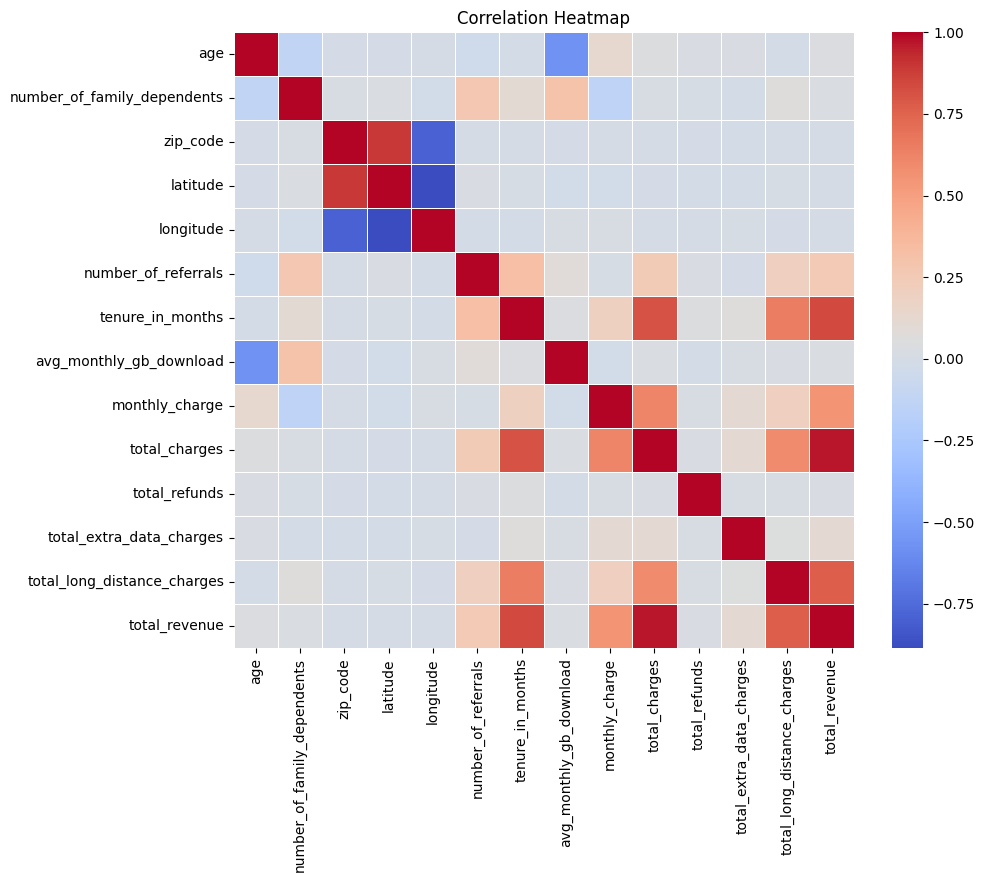

In [8]:
# Select only numeric columns from the DataFrame
d
# Calculate the correlation matrix
correlation_matrix = numeric_raw.corr()

# Create a correlation heatmap using Seaborn


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### The heatmap shows correlations in between the variables.

### there are some expected ones e.g., There are extremely high or low correlation between longitude and latitude and Zip code. Monthly charge correlated to total charge. Age is negatively correlated to avg_monthly_gb_download, meaning that when people getting order they tend not to using internet that much.

### there are unexpected ones such as number_of_family_dependents and has a negative correlation with the monthly charge variable which seems counter-intuitive.

In [9]:
raw.columns.tolist()

['viewer_id',
 'gender',
 'age',
 'married',
 'number_of_family_dependents',
 'city',
 'zip_code',
 'latitude',
 'longitude',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_hi-res_streaming',
 'subscription_type',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'viewer_status']

The columns I leave out is
- Latitude and Longitude and ZIP code:
While these offer precise location information, the city and zip code columns already provide sufficient location data. Latitude and longitude and zip code have several values, so it could result in overfitting. Therefore, we should keep city only, and it is enough to represent Latitude and Longitude and ZIP code.

-  'Total Revenue'
since it's a derivative of the other charges and refunds.

In [10]:
total=['viewer_id',
 'gender',
 'age',
 'married',
 'number_of_family_dependents',
 'city',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_hi-res_streaming',
 'subscription_type',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'viewer_status']

In [11]:
df = raw[total]

## Checking for outliers


In [12]:
def is_binary(column):
    unique_values = column.dropna().unique()
    return len(unique_values) == 2

# Apply the function to each column and filter out non-binary columns
df_binary_columns = df.loc[:, df.apply(is_binary)]
binary_columns = df_binary_columns.columns.tolist()
binary_columns

['gender',
 'married',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_hi-res_streaming',
 'paperless_billing',
 'viewer_status']

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
non_binary_categorical_columns = [col for col in categorical_columns if col not in binary_columns]

In [14]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()


In [15]:
numeric_columns

['age',
 'number_of_family_dependents',
 'number_of_referrals',
 'tenure_in_months',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges']

In [16]:
non_binary_categorical_columns = [col for col in non_binary_categorical_columns if col != 'viewer_id']
non_binary_categorical_columns

['city', 'offer', 'internet_type', 'subscription_type', 'payment_method']

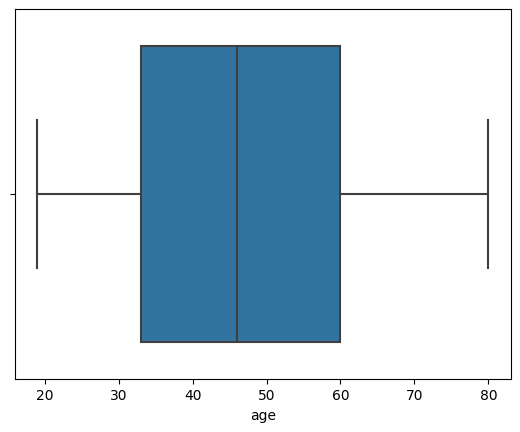

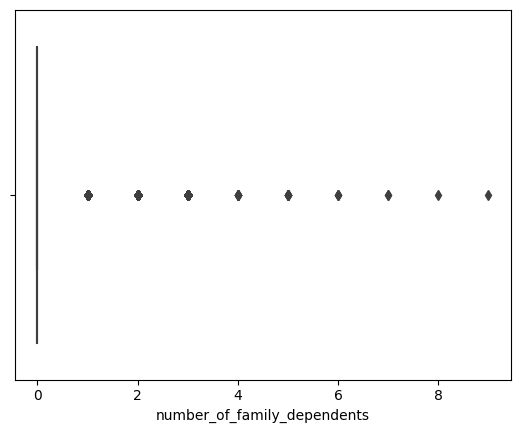

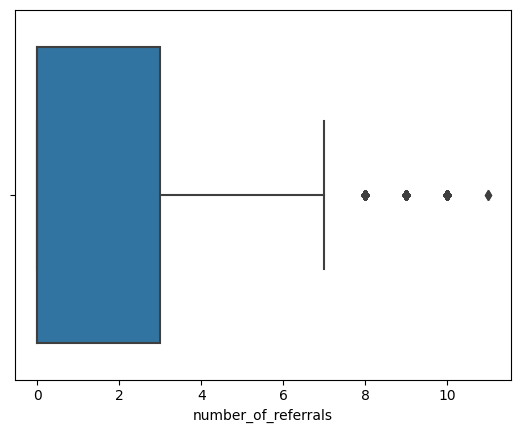

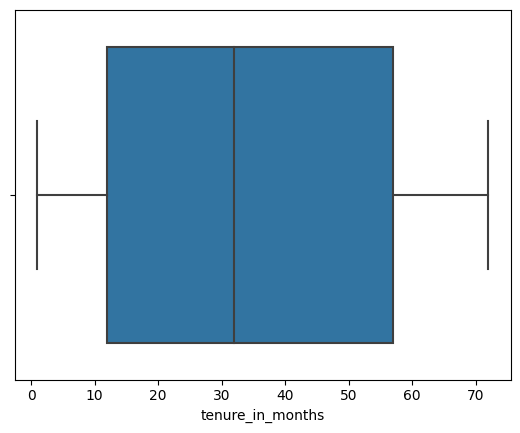

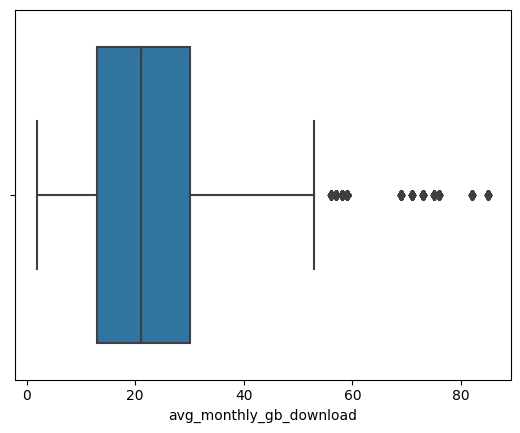

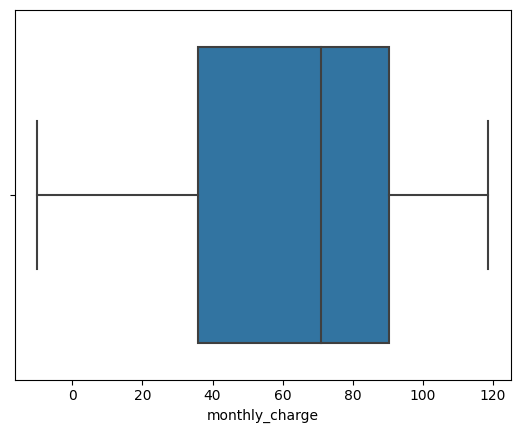

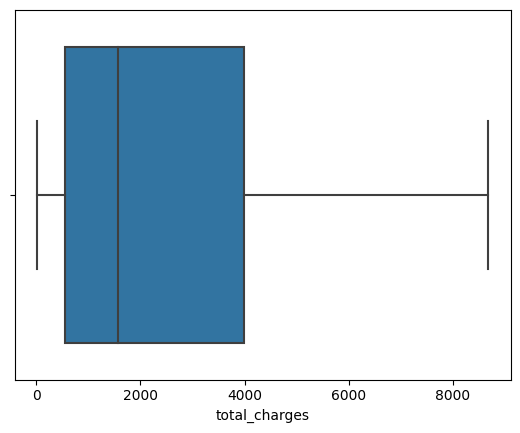

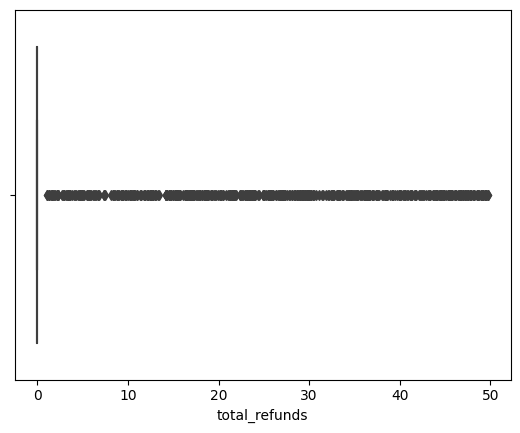

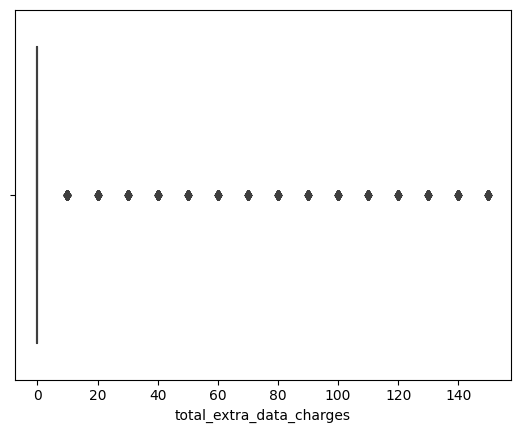

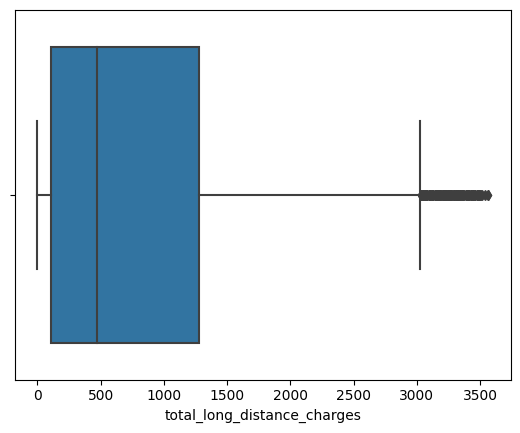

In [17]:
# When checking outliers, I exclude
# 1. Unique identifier: viewer_id
# 2. Categorical Columns, including zip_code because Although zip_code is numerical, it's a categorical variable
#    representing a geographical location, not a quantitative measurement.
# 3. Binary Variables
column_headers_list = df.columns.tolist()
for var in column_headers_list:
    if var in ['viewer_id','zip_code'] + non_binary_categorical_columns + binary_columns:
        continue
    else:
        plt.figure(var)
        sns.boxplot(x = df[var])

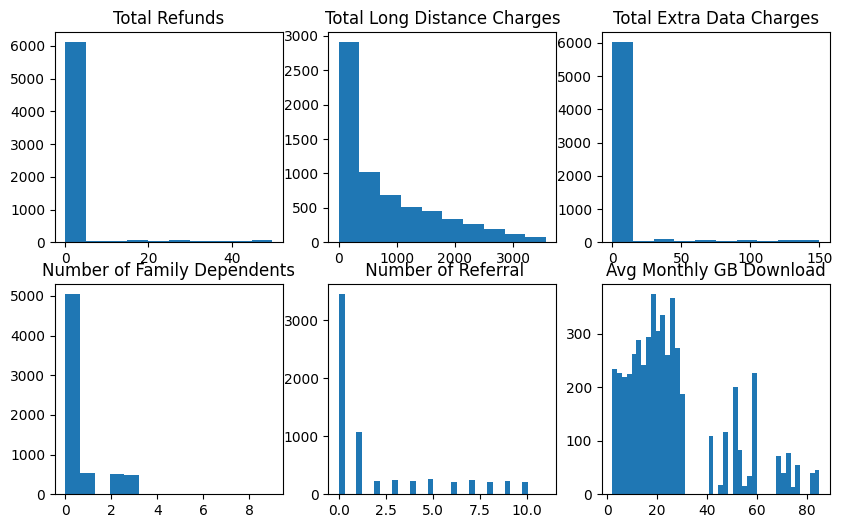

In [18]:
# Show histogram to see the distibution of each attribute.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
ax[0,0].hist(df['total_refunds'])
ax[0,1].hist(df['total_long_distance_charges'])
ax[0,2].hist(df['total_extra_data_charges'])
ax[1,0].hist(df['number_of_family_dependents'], bins='auto')
ax[1,1].hist(df['number_of_referrals'], bins='auto')
ax[1,2].hist(df['avg_monthly_gb_download'], bins='auto')



ax[0, 0].set_title('Total Refunds')
ax[0, 1].set_title('Total Long Distance Charges')
ax[0, 2].set_title('Total Extra Data Charges')
ax[1, 0].set_title('Number of Family Dependents')
ax[1, 1].set_title(' Number of Referral')
ax[1, 2].set_title('Avg Monthly GB Download')


plt.show()


- Total_refunds and total_extra_data_charge has a lot of outliers, but considering most cases people do not refund or require extra data service, it seems still reasonable that the mean is almost 0 and so there are some  cases with huge values.
- Number of family dependents and number of referral, about this columns, it looks like there are cases in each category. It would be better to keep the raw data.

- For the rest, I drop outliers using the Interquartile Range (IQR) Method

In [19]:
# For the rest, I drop outliers using the Interquartile Range (IQR) Method
for var in ['avg_monthly_gb_download','total_long_distance_charges']:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)

    IQR = Q3 - Q1

    low_lim = Q1 - (2.5 * IQR)
    upp_lim = Q3 + (2.5 * IQR)

    df = df[~((df[var] < low_lim) | (df[var] > upp_lim))]

In [20]:
# Furthermore, before we notice that there are some negative value in charge column. It may be unreasonable
# It is better to drop them.
df = df[df['monthly_charge'] >0]

In [21]:
df.shape

(6247, 29)

### Imputing missing values and removing duplicate rows

In [22]:
missing_value_columns = df.columns[df.isnull().any()].tolist()
for column in missing_value_columns:
    print(f"Unique values in {column} (excluding NaN):")
    print(df[column].dropna().unique())

Unique values in internet_type (excluding NaN):
['Cable' 'Fiber Optic' 'DSL']
Unique values in avg_monthly_gb_download (excluding NaN):
[16. 30.  4. 11.  7. 21. 14. 10. 59. 19. 12. 20. 17.  9. 52. 57. 51. 22.
 23. 27.  2. 69. 53. 15. 29. 28. 18. 48. 25. 26.  8.  6.  5. 13. 24. 41.
 47. 71. 58. 42.  3. 56. 46. 39.]
Unique values in online_security (excluding NaN):
['No' 'Yes']
Unique values in online_backup (excluding NaN):
['Yes' 'No']
Unique values in device_protection_plan (excluding NaN):
['No' 'Yes']
Unique values in premium_tech_support (excluding NaN):
['Yes' 'No']
Unique values in streaming_tv (excluding NaN):
['Yes' 'No']
Unique values in streaming_movies (excluding NaN):
['No' 'Yes']
Unique values in streaming_music (excluding NaN):
['No' 'Yes']
Unique values in unlimited_hi-res_streaming (excluding NaN):
['Yes' 'No']


In [23]:
# since the missing value seems to be of the people without internet service
# I substitute the value of these columns into 0 or no.
df['internet_type'] = df['internet_type'].fillna('None')
df['avg_monthly_gb_download'] = df['avg_monthly_gb_download'].fillna(0)
for var in ['online_security','online_backup','device_protection_plan','premium_tech_support','streaming_tv','streaming_movies',\
            'streaming_music','unlimited_hi-res_streaming']:
    df[var] = df[var].fillna('No')


In [24]:
#now there should be no missing value
df.isna().sum()

viewer_id                      0
gender                         0
age                            0
married                        0
number_of_family_dependents    0
city                           0
number_of_referrals            0
tenure_in_months               0
offer                          0
internet_service               0
internet_type                  0
avg_monthly_gb_download        0
online_security                0
online_backup                  0
device_protection_plan         0
premium_tech_support           0
streaming_tv                   0
streaming_movies               0
streaming_music                0
unlimited_hi-res_streaming     0
subscription_type              0
paperless_billing              0
payment_method                 0
monthly_charge                 0
total_charges                  0
total_refunds                  0
total_extra_data_charges       0
total_long_distance_charges    0
viewer_status                  0
dtype: int64

### make binary and dummy variables

In [25]:
for column in non_binary_categorical_columns:
    print(f"Unique values in {column} (excluding NaN):")
    print(df[column].dropna().unique())

Unique values in city (excluding NaN):
['SD' 'LA' 'SJ' 'SF']
Unique values in offer (excluding NaN):
['None' 'Offer E' 'Offer D' 'Offer B' 'Offer A' 'Offer C']
Unique values in internet_type (excluding NaN):
['Cable' 'Fiber Optic' 'DSL' 'None']
Unique values in subscription_type (excluding NaN):
['One Year' 'Month-to-Month' 'Two Year']
Unique values in payment_method (excluding NaN):
['Credit Card' 'Bank Withdrawal' 'Mailed Check']


In [26]:
non_binary_categorical_columns=[col for col in non_binary_categorical_columns if col !='viewer_id']
non_binary_categorical_columns

['city', 'offer', 'internet_type', 'subscription_type', 'payment_method']

In [27]:
df_dummies = pd.get_dummies(df[non_binary_categorical_columns], drop_first=False)

# Concatenate the original DataFrame with the new dummy variables
df = pd.concat([df, df_dummies], axis=1)

# Drop the original non-binary categorical columns from the DataFrame
df.drop(non_binary_categorical_columns, axis=1, inplace=True)

In [28]:
# Substitute variables for binary data
# Yes: 1, No: 0
for var in binary_columns:
    if var in ['viewer_status', 'gender']:
        continue
    df[var] = df[var].map({'Yes': 1, 'No': 0})
# Gender: 1 is Male, else is Female.
# viewer_status: 1 is Churned, else is Stayed.
df['viewer_status'] = df['viewer_status'].map({'Churned': 1, 'Stayed': 0})
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [29]:
df

,viewer_id,gender,age,married,number_of_family_dependents,number_of_referrals,tenure_in_months,internet_service,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,paperless_billing,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,viewer_status,city_LA,city_SD,city_SF,city_SJ,offer_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,subscription_type_Month-to-Month,subscription_type_One Year,subscription_type_Two Year,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check
0,0002-ORFBO,0,37,1,0,2,9,1,16.0,0,1,0,1,1,0,0,1,1,65.60,593.30,0.0,0,381.51,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,0004-TLHLJ,1,50,0,0,0,4,1,30.0,0,0,1,0,0,0,0,1,1,73.90,280.85,0.0,0,134.60,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
3,0011-IGKFF,1,78,1,0,1,13,1,4.0,0,1,1,0,1,1,0,1,1,98.00,1237.85,0.0,0,361.66,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
4,0013-EXCHZ,0,75,1,0,3,3,1,11.0,0,0,0,1,1,0,0,1,1,83.90,267.40,0.0,0,22.14,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
6,0014-BMAQU,1,52,1,0,8,63,1,7.0,1,0,0,1,0,0,0,0,1,84.65,5377.80,0.0,20,816.48,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,9986-BONCE,0,36,0,0,0,4,0,0.0,0,0,0,0,0,0,0,0,0,20.95,85.50,0.0,0,8.04,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
6584,9987-LUTYD,0,20,0,0,0,13,1,59.0,1,0,0,1,0,0,1,1,0,55.15,742.90,0.0,0,606.84,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
6585,9992-RRAMN,1,40,1,0,1,22,1,17.0,0,0,0,0,0,1,1,1,1,85.10,1873.70,0.0,0,356.40,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
6586,9993-LHIEB,1,21,1,0,5,67,1,58.0,1,0,1,1,0,1,1,1,0,67.85,4627.65,0.0,0,142.04,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0


### Scaling the data

In [30]:
from sklearn.preprocessing import StandardScaler

# Select numeric variables for scaling
df_scaled = df.copy()

# I use standard scaler for scaling.
scaler = StandardScaler()
scaler.fit(df[numeric_columns])
# Fit and transform the data
df_scaled[numeric_columns] = scaler.transform(df[numeric_columns])

In [31]:
df_scaled

,viewer_id,gender,age,married,number_of_family_dependents,number_of_referrals,tenure_in_months,internet_service,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,paperless_billing,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,viewer_status,city_LA,city_SD,city_SF,city_SJ,offer_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,subscription_type_Month-to-Month,subscription_type_One Year,subscription_type_Two Year,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check
0,0002-ORFBO,0,-0.627209,1,-0.488112,-0.002976,-1.062207,1,-0.160199,0,1,0,1,1,0,0,1,1,-0.006909,-0.805064,-0.255662,-0.277557,-0.486485,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,0004-TLHLJ,1,0.154634,0,-0.488112,-0.667023,-1.270786,1,0.635864,0,0,1,0,0,0,0,1,1,0.269352,-0.943469,-0.255662,-0.277557,-0.775689,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
3,0011-IGKFF,1,1.838603,1,-0.488112,-0.335000,-0.895344,1,-0.842539,0,1,1,0,1,1,0,1,1,1.071508,-0.519551,-0.255662,-0.277557,-0.509735,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
4,0013-EXCHZ,0,1.658178,1,-0.488112,0.329047,-1.312502,1,-0.444507,0,0,0,1,1,0,0,1,1,0.602197,-0.949427,-0.255662,-0.277557,-0.907412,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
6,0014-BMAQU,1,0.274917,1,-0.488112,1.989164,1.190446,1,-0.671954,1,0,0,1,0,0,0,0,1,0.627160,1.314303,-0.255662,0.500499,0.022991,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,9986-BONCE,0,-0.687351,0,-0.488112,-0.667023,-1.270786,0,-1.069985,0,0,0,0,0,0,0,0,0,-1.493060,-1.030002,-0.255662,-0.277557,-0.923927,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
6584,9987-LUTYD,0,-1.649619,0,-0.488112,-0.667023,-0.895344,1,2.284851,1,0,0,1,0,0,1,1,0,-0.354732,-0.738797,-0.255662,-0.277557,-0.222558,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
6585,9992-RRAMN,1,-0.446784,1,-0.488112,-0.335000,-0.519902,1,-0.103338,0,0,0,0,0,1,1,1,1,0.642138,-0.237892,-0.255662,-0.277557,-0.515896,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0
6586,9993-LHIEB,1,-1.589478,1,-0.488112,0.993094,1.357309,1,2.227989,1,0,1,1,0,1,1,1,0,0.067981,0.982012,-0.255662,-0.277557,-0.766974,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0


# 2. Clustering

## PCA

In [32]:
columns = df.columns.tolist()
columns

['viewer_id',
 'gender',
 'age',
 'married',
 'number_of_family_dependents',
 'number_of_referrals',
 'tenure_in_months',
 'internet_service',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_hi-res_streaming',
 'paperless_billing',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'viewer_status',
 'city_LA',
 'city_SD',
 'city_SF',
 'city_SJ',
 'offer_None',
 'offer_Offer A',
 'offer_Offer B',
 'offer_Offer C',
 'offer_Offer D',
 'offer_Offer E',
 'internet_type_Cable',
 'internet_type_DSL',
 'internet_type_Fiber Optic',
 'internet_type_None',
 'subscription_type_Month-to-Month',
 'subscription_type_One Year',
 'subscription_type_Two Year',
 'payment_method_Bank Withdrawal',
 'payment_method_Credit Card',
 'payment_method_Mailed Check']

In [33]:
# Making a df of only the scaled features
#I will leave out unique identifier and the label out of the PCA.
# In this way, I apply PCA only to the features to 
# helps in identifying the principal components that explain the most variance in the data.
# I do not want viewer_status get out of the datasets.
pca = PCA()

scaled_features = pd.DataFrame()

for var in columns:
    if var in ('viewer_id','viewer_status'):
        continue
    else:
        scaled_features[var] = df_scaled[var]

pca.fit(scaled_features)

PCA()

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

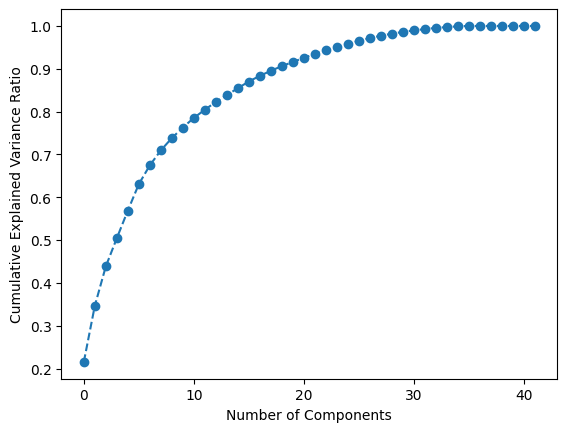

In [34]:
plt.figure()
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

# Label the x-axis
plt.xlabel('Number of Components')

# Label the y-axis
plt.ylabel('Cumulative Explained Variance Ratio')

# Hence around 11 components explain 80% of the variation. So we will go with 12 components instead of 40

In [35]:
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
cumulative_variance_ratio

array([0.21557384, 0.34662808, 0.43867202, 0.50448172, 0.56884099,
       0.63053086, 0.67454225, 0.70939711, 0.73811253, 0.76271516,
       0.78518601, 0.8042796 , 0.82240394, 0.83864014, 0.85444739,
       0.87019507, 0.88337725, 0.89519251, 0.90607173, 0.9158621 ,
       0.92537077, 0.93459338, 0.94305552, 0.95098564, 0.95828788,
       0.96517321, 0.97141915, 0.97725939, 0.98180821, 0.98605846,
       0.98948744, 0.99262775, 0.99539603, 0.99730913, 0.9989738 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [36]:
n_components_80_variance = (cumulative_variance_ratio >= 0.80).argmax() + 1
n_components_80_variance

12

In [37]:
# Performing PCA with 11 components
pca = PCA(n_components = 12)
pca.fit(scaled_features)

PCA(n_components=12)

In [38]:
scores_pca = pca.transform(scaled_features)

# Clustering

In [39]:
wcss = [] #Within-cluster sum of squares

for i in range(1,20):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

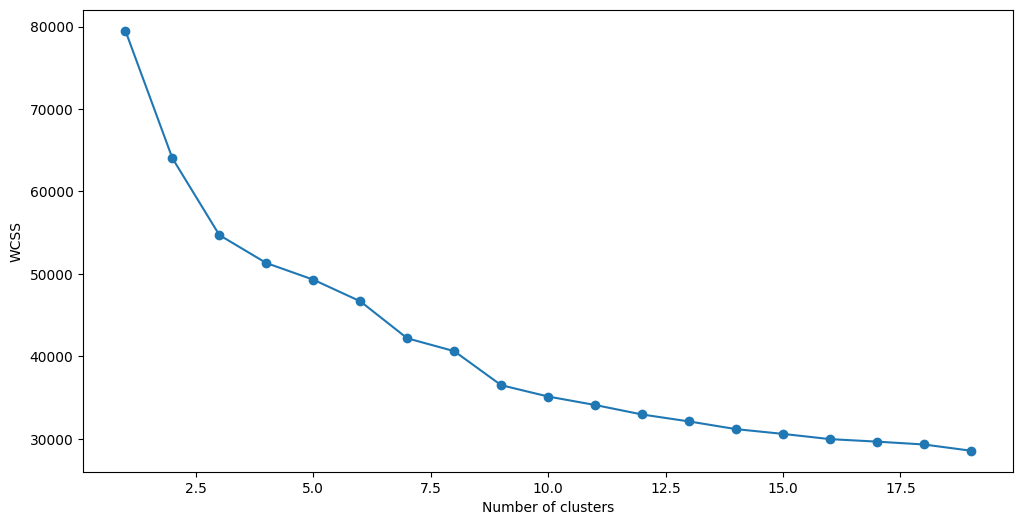

In [40]:
# Deciding on the number of clusters using elbow method

plt.figure(figsize=(12,6))
plt.plot(range(1,20), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [41]:
#  Calculating k-means with 3 clusters, because it seems that the slope decrease dramatically and near 0 after 3
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [42]:
# adding the labels
df['clusters'] = kmeans_pca.labels_

In [43]:
scores_pca[:, 0]

array([-0.93318379, -1.40594112, -0.27103007, ..., -0.32849459,
        1.86699876,  0.76443055])

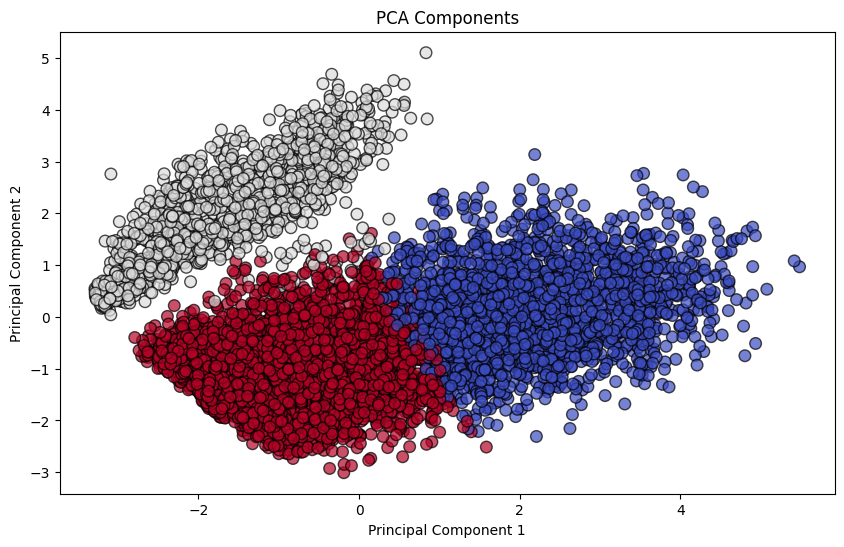

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(scores_pca[:, 0], scores_pca[:, 1], c=df['clusters'], cmap='coolwarm', marker='o', edgecolor='k', s=70, alpha=0.7)
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# 3. Build two models to predict churn using different supervised learning approaches. What are the top 5 most predictive factors? How do the models compare in terms of accuracy? (6 points)

### Before we run a model, we need to reduce the number of features and exclude the highly correlated ones

In [45]:
# Defingina threshold to remove collinear
def remove_collinear_features(x, threshold):
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

In [46]:
# excluding the id matrices as well as the outcome ones from the value of x. Moreover, we
# are using the scaled dataframe
features = [col for col in columns if col not in ['viewer_id','viewer_status']]

# We see that a couple of variables have high correlations. So we must drop them.

In [47]:
# Set 0.8 as threshold
use_features = remove_collinear_features(df_scaled[features], 0.8)
use_features

Removed Columns {'streaming_music', 'total_charges', 'payment_method_Credit Card', 'internet_type_None'}


,gender,age,married,number_of_family_dependents,number_of_referrals,tenure_in_months,internet_service,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,unlimited_hi-res_streaming,paperless_billing,monthly_charge,total_refunds,total_extra_data_charges,total_long_distance_charges,city_LA,city_SD,city_SF,city_SJ,offer_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,subscription_type_Month-to-Month,subscription_type_One Year,subscription_type_Two Year,payment_method_Bank Withdrawal,payment_method_Mailed Check
0,0,-0.627209,1,-0.488112,-0.002976,-1.062207,1,-0.160199,0,1,0,1,1,0,1,1,-0.006909,-0.255662,-0.277557,-0.486485,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1,0.154634,0,-0.488112,-0.667023,-1.270786,1,0.635864,0,0,1,0,0,0,1,1,0.269352,-0.255662,-0.277557,-0.775689,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0
3,1,1.838603,1,-0.488112,-0.335000,-0.895344,1,-0.842539,0,1,1,0,1,1,1,1,1.071508,-0.255662,-0.277557,-0.509735,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0
4,0,1.658178,1,-0.488112,0.329047,-1.312502,1,-0.444507,0,0,0,1,1,0,1,1,0.602197,-0.255662,-0.277557,-0.907412,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
6,1,0.274917,1,-0.488112,1.989164,1.190446,1,-0.671954,1,0,0,1,0,0,0,1,0.627160,-0.255662,0.500499,0.022991,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,0,-0.687351,0,-0.488112,-0.667023,-1.270786,0,-1.069985,0,0,0,0,0,0,0,0,-1.493060,-0.255662,-0.277557,-0.923927,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0
6584,0,-1.649619,0,-0.488112,-0.667023,-0.895344,1,2.284851,1,0,0,1,0,0,1,0,-0.354732,-0.255662,-0.277557,-0.222558,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
6585,1,-0.446784,1,-0.488112,-0.335000,-0.519902,1,-0.103338,0,0,0,0,0,1,1,1,0.642138,-0.255662,-0.277557,-0.515896,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0
6586,1,-1.589478,1,-0.488112,0.993094,1.357309,1,2.227989,1,0,1,1,0,1,1,0,0.067981,-0.255662,-0.277557,-0.766974,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [48]:
# computing VIF to confirm the high collinearity which exists between the features
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[features]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

# Hence the first bunch has a lot of collinear features. We can remove them.

/Users/hsutingyu/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,Column
41,inf,payment_method_Mailed Check
29,inf,offer_Offer C
27,inf,offer_Offer A
26,inf,offer_None
25,inf,city_SJ
24,inf,city_SF
23,inf,city_SD
22,inf,city_LA
30,inf,offer_Offer D
31,inf,offer_Offer E


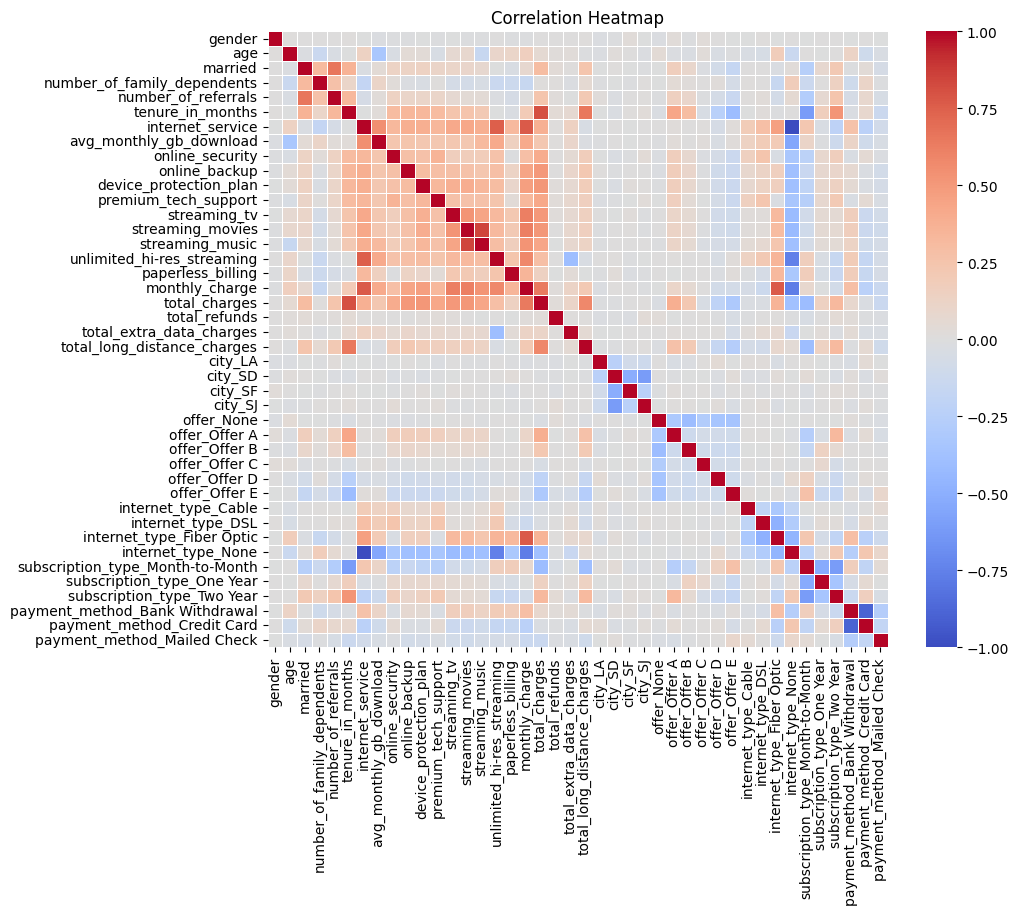

In [49]:
# Calculate the correlation matrix
correlation_matrix = df[features].corr()

# Create a correlation heatmap using Seaborn


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

I do heatmap again to see which attributes correlated
- There are correlation relationship between cities.
- As we know from previous, 1400(20%) datasets did not have internet service and the service detail columns are set to No. The correlation is obvious.
- There are also correlationship between payment.
- We can see that internet_service is highly correlated to other variables, which is reasonable and related to the missing value part. People without internet service will difintely have no service details, like streaming and internet security.
- Thus I remove these columns and recalculate the VIF again.

In [50]:
feature_cols = [col for col in features if col not in ['city_SJ', 'city_SF','city_SD','city_LA','offer_None','internet_type_None','internet_service','payment_method_Bank Withdrawal','']]
X = df[feature_cols]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
28,25.915431,internet_type_Fiber Optic
16,22.580859,monthly_charge
29,22.520296,subscription_type_Month-to-Month
31,15.668170,subscription_type_Two Year
17,11.499462,total_charges
30,11.448183,subscription_type_One Year
27,9.901897,internet_type_DSL
5,8.606084,tenure_in_months
26,6.346138,internet_type_Cable
14,6.144738,unlimited_hi-res_streaming


Now, VIF maintains at a low level. 

Still, we can see charge-related columns have high VIF. Total_charges is related to other attribute. This is becuase it can be derivatived from summation of monthly charge and extra charge minus refund.

### Model 1: logistics regression

In logistic regression, we are predicting the likelihood that Y=1 (rather than 0) given certain values of Xs.

In this topic, we are asking “Will a given person stay or churn?”

Therefore, we should apply logistics regression model to answer this binary classification problem.

In [51]:
# create a cross-validation object with 5 folds
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [52]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(use_features, df_scaled['viewer_status'], test_size=0.2, random_state=42)

# Create a linear regression model
lr_model = LogisticRegression()

# Use cross-validation on the training set to find the mean squared error of the model
mse_scores = -cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# use accuracy to determine the model power
accuracy_f1 = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='f1')
mean_f1 = accuracy_f1.mean()
accuracy = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
mean_accuracy = accuracy.mean()

# Calculate the mean MSE and standard deviation of the scores
mean_mse = mse_scores.mean()

print(f'Training set - Mean MSE: {mean_mse:.2f}, Mean Accuracy: {mean_accuracy:.2f}, Mean F1-Score: {mean_f1:.2f}')

# # Evaluate the model on the test set
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
test_mse = ((lr_pred - y_test) ** 2).mean()

print(f'Test set - MSE: {test_mse:.2f}')

Training set - Mean MSE: 0.15, Mean Accuracy: 0.85, Mean F1-Score: 0.73
Test set - MSE: 0.16


### Model 2: Random Forest Regression

In [53]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(use_features, df_scaled['viewer_status'], test_size=0.2, random_state=42)

# Create a random forest regression model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)

# Use cross-validation on the training set to find the mean squared error of the model
#use f1 score and accuracy
accuracy_f1 = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='f1')
mean_f1 = accuracy_f1.mean()
accuracy = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
mean_accuracy = accuracy.mean()
# #

# Calculate the mean MSE of the scores
mean_mse = mse_scores.mean()

print(f'Training set - Mean MSE: {mean_mse:.2f}, Mean Accuracy: {mean_accuracy:.2f}, Mean F1-Score: {mean_f1:.2f}')

# Evaluate the model on the test set
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
test_mse = ((rf_pred - y_test) ** 2).mean()

print(f'Test set - MSE: {test_mse:.2f}')

Training set - Mean MSE: 0.15, Mean Accuracy: 0.85, Mean F1-Score: 0.73
Test set - MSE: 0.14


### How do the models compare in terms of accuracy?

The accuracy of the two model are the same. MSE of random forest are smaller both in training and test data. This means that the random forest model is better.

## What are the top 5 most predictive factors?

### RANDOM FOREST

In [54]:
# get the feature importances
importances = rf_model.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'feature': use_features.columns, 'importance': importances})

# sort the features by importance, in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

# print the top 5 most important features
print(feature_importances.head(5))

                            feature  importance
0                  tenure_in_months    0.166226
1  subscription_type_Month-to-Month    0.115340
2       total_long_distance_charges    0.086952
3                    monthly_charge    0.079390
4                               age    0.070257


### Logistic Regression

In [55]:
# Top 5 for logistics regression
from sklearn.feature_selection import SelectKBest, f_regression

In [56]:
X = use_features
y = df_scaled['viewer_status']

kbest = SelectKBest(score_func=f_regression, k=5)
X_new = kbest.fit_transform(X, y)

In [57]:
selected_features = [X.columns[i] for i in kbest.get_support(indices=True)]

In [58]:
# print the coefficients of the selected features
print(selected_features)

['number_of_referrals', 'tenure_in_months', 'offer_Offer E', 'subscription_type_Month-to-Month', 'subscription_type_Two Year']


In [59]:
coefficients_flat = lr_model.coef_.flatten()

# Now create the DataFrame
coefficients = pd.DataFrame({
    'feature': use_features.columns.tolist(),
    'coefficient': coefficients_flat
})
coefficients = coefficients[coefficients['feature'].isin(selected_features)]# restricting to just the top 5 features

coefficients = coefficients.sort_values('coefficient', ascending=True).reset_index(drop=True)
print(coefficients)

                            feature  coefficient
0               number_of_referrals    -1.490918
1        subscription_type_Two Year    -1.180939
2                  tenure_in_months    -0.939079
3                     offer_Offer E     0.480240
4  subscription_type_Month-to-Month     1.270518


# We see that number_of_referrals, subscription_type_Two Year, tenure_in_months, offer_Offer E, subscription_type_Month-to-Month have the biggest coefficients

- Seeing the extremely low coefficient of 'subscription_type_Two Year', we can see that people with subscription are tend to stay. On the other hand, 'subscription_type_Month-to-Month' has higher coefficient. People subscribe monthly have more flexibilty and less cost to cancel their service.
- The huge negative of 'number of referral' indicates that people refers more friend keep using Knet-Flicks as viewer_status easliy be 0. People refers other because they love this service and have high satifaction in the service and are willing to share with others. This group of people are more willing to keep using. Moreover, the referal may have reward, and with that the people will keep pay at a lower price.

- About tenure_in_months, customers with longer relationship tend to stay and have loyalty in Knet-Flicks.

- Offer E has positive coefficient shows that people with offer E tend to leave. It is suggested to revise offer E policy to attract customers.

# 4. Based on the clustering models, which customer segment in the data is most at risk for churn? What actions would you recommend to reduce churn for this segment? (4 points)

In [60]:
cluster_means = df.groupby('clusters').mean()
print(cluster_means)


            gender        age   married  number_of_family_dependents  \
clusters                                                               
0         0.503686  48.092875  0.718919                     0.515479   
1         0.500736  43.108247  0.534610                     0.806333   
2         0.499299  49.011212  0.333217                     0.262439   

          number_of_referrals  tenure_in_months  internet_service  \
clusters                                                            
0                    3.222604         58.246683          1.000000   
1                    2.405744         34.740795          0.027982   
2                    0.954800         17.372109          1.000000   

          avg_monthly_gb_download  online_security  online_backup  \
clusters                                                            
0                       25.042260         0.548894       0.677150   
1                        0.384389         0.012518       0.008100   
2                

/var/folders/h6/klvb6_m549910x127srrt7040000gn/T/ipykernel_87225/1836960076.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('clusters').mean()


Text(0, 0.5, 'Mean Value')

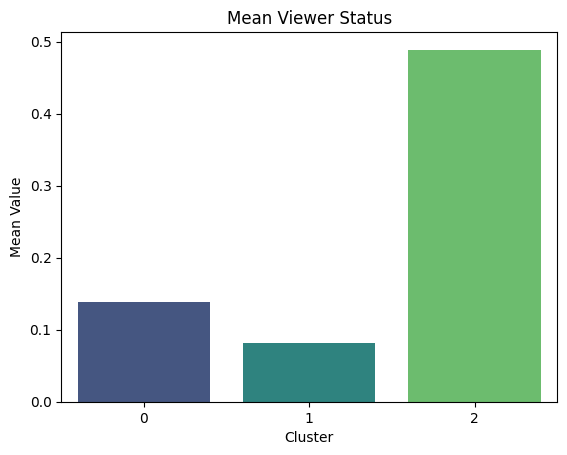

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=cluster_means.index, y=cluster_means['viewer_status'], palette='viridis')
plt.title(f'Mean Viewer Status')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')

### Cluster 2 has higher status value, showing that it is most at risk for churn.

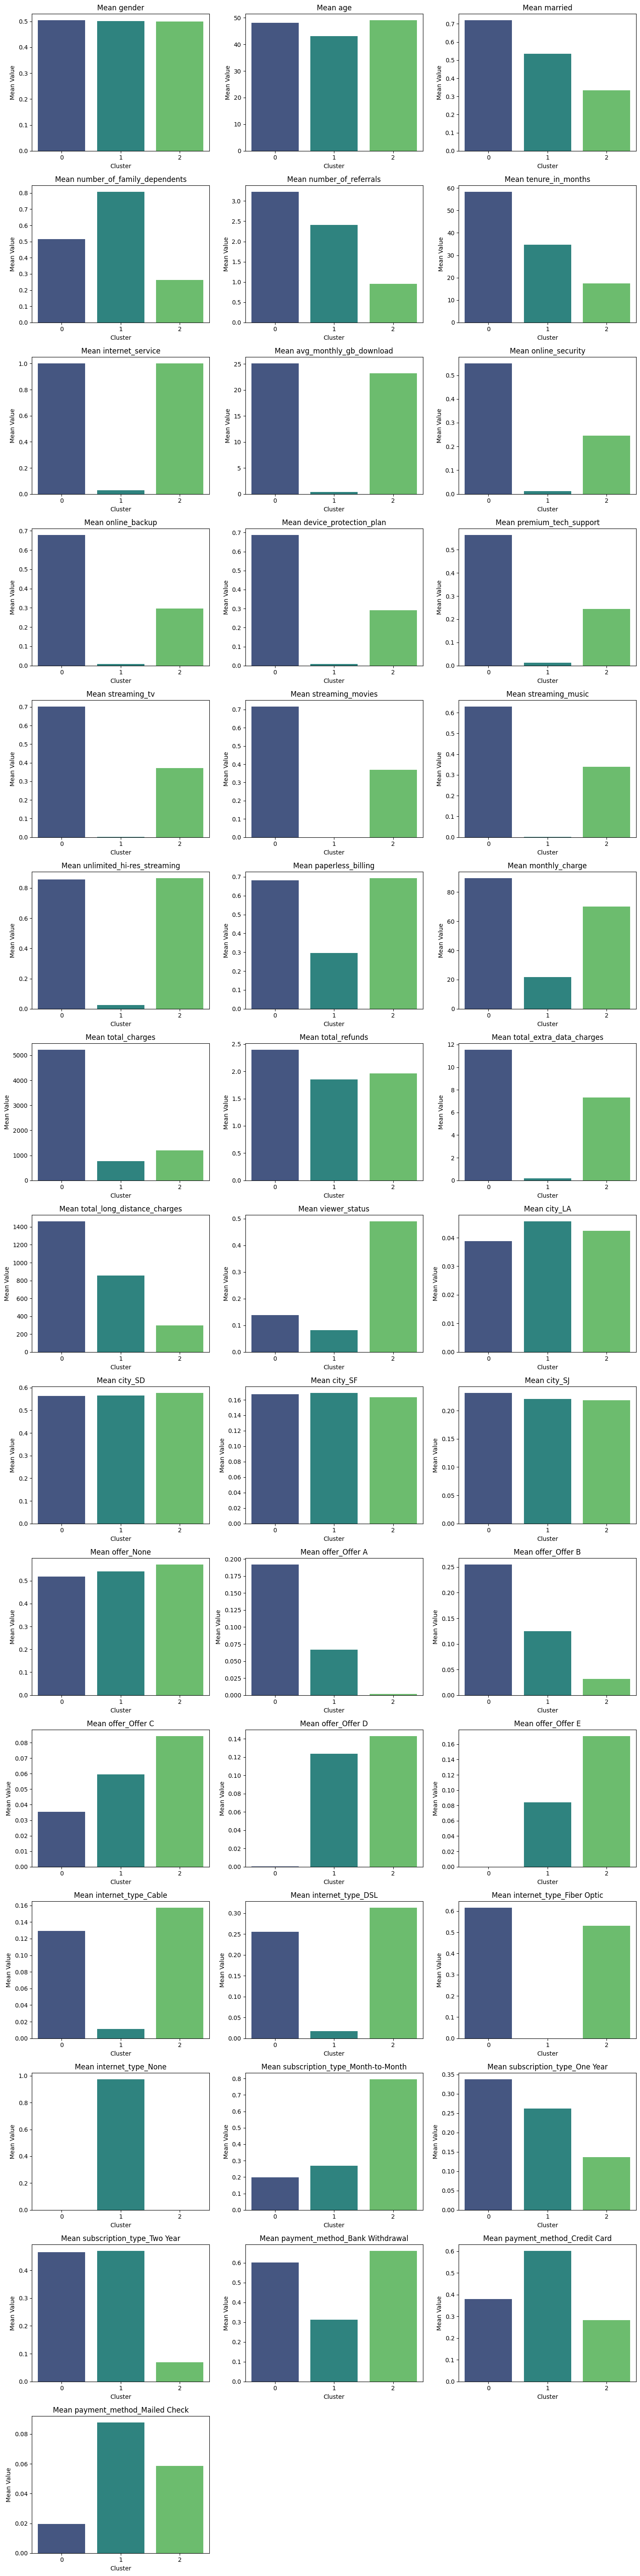

In [62]:
features = cluster_means.columns  # Features to plot
n_features = len(features)  # Number of features
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust overall figure size

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplot for each feature
    sns.barplot(x=cluster_means.index, y=cluster_means[feature], palette='viridis')
    plt.title(f'Mean {feature}')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')

plt.tight_layout()  # Adjust layout to make room for each subplot
plt.show()


# What actions would you recommend to reduce churn for this segment?

From the top five most predictive factors, we understand that individuals with subscriptions tend to stay. Therefore, I would introduce subscription offers or trials to more comprehensive internet packages for them. Cluster 12 predominantly opts for Offers C, D, and E, which may indicate dissatisfaction with the service. I will propose customized packages tailored to their unique needs or competitive pricing strategies to address cost concerns. The majority of individuals in Cluster 2 are unmarried and have fewer family dependents. For these single customers, I recommend a package with a lower GB amount. It's possible that Cluster 2 perceives the offer as providing too much GB, believing they could find a cheaper deal with less GB from another company.

The monthly charge for Cluster 2 is not the lowest, so I will offer them a discount.